# Análise de vendas para empresa Online Ice

A análise a ser elaborada será para a empresa online Ice, que comercializa videogames no mundo inteiro. Determinada empresa necessita de uma análise sobre plataformas mais vendidas, gêneros de jogos mais vendidos, quão relevantes são as avaliações de usuários e de mídia profissional para as vendas.

O objetivo da análise é a montagem da campanha para vendas de 2017.

Para a análise dos dados, foram disponibilizados arquivos de vendas regionais de jogos, suas respectivas avaliações e classificações.

A base de dados possui as seguintes colunas:

- Name (nome)
- Platform (plataforma)
- Year_of_Release (Ano de lançamento)
- Genre(gênero)
- NA_sales (vendas norte-americanas em milhões de USD)
- EU_sales (vendas na Europa em milhões de USD)
- JP_sales (vendas no Japão em milhões de USD)
- Other_sales (vendas em outros países em em milhões de USD)
- Critic_Score - (Pontuação crítica) (máximo de 100)
- User_Score - (Pontuação do usuário) (máximo de 10)
- Classificação (ESRB)

## Importação de bibliotecas, dataframe e visualização dos dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy import stats as st
import numpy as np

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Nota-se a ausencia de dados nas colunas *name*, *year_of_release*, *critic_score*, *user_score* e *rating*, do qual ainda é possível verificar que as colunas possuem os nomes com letras maiúsculas, para tanto, iremos padronizar as letras em minúsculo para facilitar a modelagem, existem também colunas com tipo de dados incorretos, são elas *year_of_release*, *user_score*. Todas essas tarefas serão realizadas nas próximas linhas. 

## Preparação dos dados

In [5]:
# Transformando as colunas com as colunas em minúsculo.

games.columns = games.columns.str.lower()

In [6]:
# Utilizando a coluna name para saber se existe algum padrão nos valores nulos

games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# Observando se há outros jogos em GEN
games[games['platform']=='GEN'].shape

(29, 11)

In [8]:
# Decidido excluir linhas pois além de name existem várias outras informações ausentes
games = games[~games['name'].isnull()]

In [9]:
# Conferindo a ação anterior
games[games['platform']=='GEN'].shape

(27, 11)

In [10]:
# Verificando year of release e identificando algum padrão nos valores nulos da coluna
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
# Como a porcentagem é pequena vamos excluir tais linhas para facilitar a modelagem do codigo
games['year_of_release'].dropna(inplace = True)

In [12]:
# Verificando se foi convertido e valores nulos
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [13]:
# Vamos verificar aqui, que a coluna critic_score, user_score e rating são todas igualmente nulas

games[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
games[(games['critic_score'].isnull()) & (~games['rating'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
255,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E
291,World Soccer Winning Eleven 9,PS2,2005.0,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E
...,...,...,...,...,...,...,...,...,...,...,...
16678,End of Nations,PC,2012.0,Strategy,0.01,0.00,0.00,0.00,NaN,NaN,T
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A
16688,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,0.01,0.00,0.00,0.00,NaN,tbd,T
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


In [15]:
games[games['critic_score'].isnull()].shape

(8576, 11)

In [16]:
games[(games['user_score'].isnull()).shape & (games['rating'].isnull())].shape

(6764, 11)

In [17]:
games[(games['critic_score'].isnull()) & (games['user_score'].isnull())].shape

(6661, 11)

Como existem dados de vendas mesmo para jogos que não contêm informações importantes, armazenaremos os dados e os analisaremos de acordo. O volume de dados perdidos também é enorme desta vez. Se houver necessidade de fazer uma análise que utilize uma questão de pontuação, faremos sem esta peça.

In [18]:
# Verificando user_score = tbd
games[games['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [20]:
# Verificando a quantidade de linhas onde tem tbd
games[games['user_score']=='tbd'].shape

(2424, 11)

In [21]:
# Verificando se existem linhas com valor 
games[games['user_score'] <'0'].shape

(0, 11)

É possível confirmar que pontuações com valor tbd podem ser consideradas nulas, existem jogos lançados abaixo de 2005 e ainda listados como tbd. O problema de armazenar pontos dessa forma é que a coluna é armazenada com o tipo de objeto, não permitindo que seja calculado caso seja necessário. Vamos alterar todos os campos tbd para -1 para impedir que o tipo de coluna flutue.

In [24]:
# Colocando valor -1
games['user_score'] = games['user_score'].replace('tbd','-1')

In [25]:
# Convertendo a coluna para float 
games['user_score'] = games['user_score'].astype('float')

In [26]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [27]:
# Somando vendas em todos os paises
games ['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [33]:
# Verificando a nova coluna
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


In [34]:
# Removendo dados duplicados
games.drop_duplicates()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Analise os dados

### Observando os dados de cada jogo e sua quantidade em anos diferentes, a partir disso vamos entender se esses dados por periodos são significativos.

In [35]:
# Títulos por ano
games.groupby(['year_of_release'])['year_of_release'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

In [36]:
# Criando uma função que classifique todos os periodos e simplifique-os 

def classyear (date):
    if date >= 1980 and date <= 1989:
        return ('80s')
    if date >= 1990 and date <= 1999:
        return ('90s')
    if date >= 2000 and date <= 2009:
        return ('20s')
    if date > 2009:
        return ('21s')
    else:
        return ('0')

In [37]:
# Test def
classyear(games['year_of_release'][1])

'80s'

In [45]:
# Aplicando a def
games['since_year'] = games['year_of_release'].apply(classyear)

In [50]:
# Verificando colunas
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'sum_sales', 'cla_ano', 'sinse_year', 'since_year'],
      dtype='object')

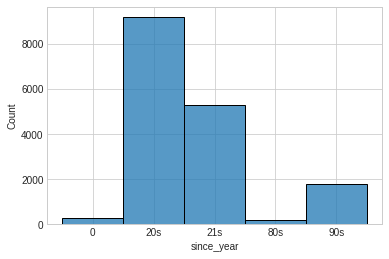

In [47]:
sns.histplot(data=games.sort_values('since_year'), x="since_year")

In [51]:
games.sort_values('since_year').groupby('since_year')['since_year'].count()

since_year
0       269
20s    9193
21s    5277
80s     205
90s    1769
Name: since_year, dtype: int64

In [53]:
#  Pivot table com a soma de vendas por período
sales_since = pd.pivot_table(games, index = 'since_year', values = ['sum_sales'], aggfunc = ['count', 'sum'])
sales_since.reset_index()

,since_year,count,sum
,,sum_sales,sum_sales
0,0,269,98.92
1,20s,9193,4614.91
2,21s,5277,2544.24
3,80s,205,376.48
4,90s,1769,1278.74


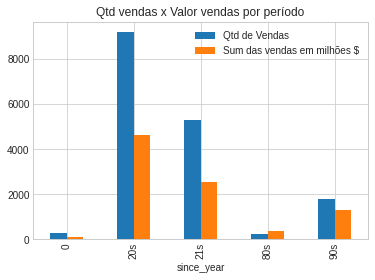

In [54]:
# Gráfico para visualizar a quantidade de vendas e o valor de vendas
pd.pivot_table(games, index = 'since_year', values = ['sum_sales'], aggfunc = ['count', 'sum']).plot (kind = 'bar')
plt.legend(['Qtd de Vendas', 'Sum das vendas em milhões $'])
plt.title('Qtd vendas x Valor vendas por período');

In [56]:
# Calculando a variação interquartil apenas para excluir outliers e visualizar melhor o boxplot
Q1 = games['sum_sales'].quantile(0.25)
Q3 = games['sum_sales'].quantile(0.75)
IQR = Q3 - Q1
games_out = games.query('(@Q1 - 1.5 * @IQR) <= sum_sales <= (@Q3 + 1.5 * @IQR)')

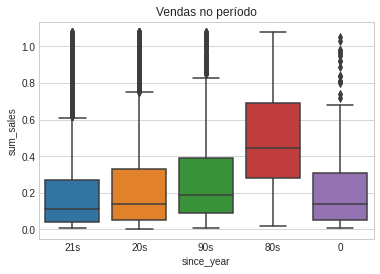

In [58]:
sns.boxplot(data=games_out, x='since_year',y='sum_sales').set(title='Vendas no período');

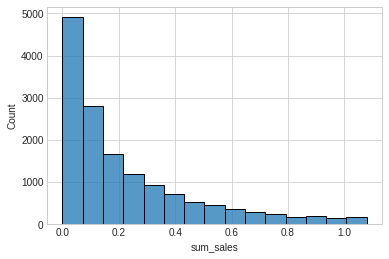

In [64]:
# Histograma que verifica a distribuição do total de vendas posterior ao tratamento dos outliers

sns.histplot(data=games_out,x='sum_sales', bins = 15);

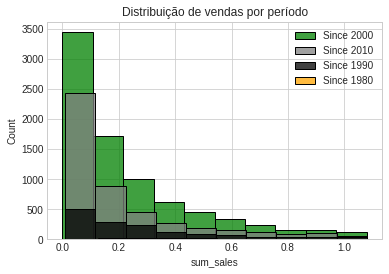

In [73]:
# Verificando a distribuição das vendas anuais depois de modelar os valores atipicos
sns.histplot(data=games_out[(games_out['year_of_release'] >= 2000) & (games_out['year_of_release'] < 2010)],x='sum_sales', color = 'green', bins = 10, pmax = 0.1)
sns.histplot(data=games_out[games_out['year_of_release'] >= 2010] ,x='sum_sales', color = 'gray', bins = 10)
sns.histplot(data=games_out[(games_out['year_of_release'] >= 1990) & (games_out['year_of_release'] < 2000)],x='sum_sales', color = 'black', bins = 10)
sns.histplot(data=games_out[games_out['year_of_release'] < 1990],x='sum_sales', color = 'orange', bins = 10 ).set(title='Distribuição de vendas por período');
plt.legend(['Since 2000', 'Since 2010','Since 1990','Since 1980']);

  Garante-se que a distribuição do total de vendas seja a mesma para jogos de todas as idades. 

  Nos anos 80 são representados em laranja, entre 90 e 99 são representados em preto, 2000 a 2009 são representados em verde e maiores que 2010 em cinza. 

  Também é possível confirmar que os jogos da década de 80 tiveram um baixo volume de vendas e a época e os jogos com alto volume de vendas foram os jogos lançados na década de 2000 (2000 a 2009), mas como os dados vão até 2016 podemos acreditar que apartir de 2016 é impossível dizer se os jogos lançados após 2010 vão superar ou não os anos 2000 em vendas.

### Vejamos como as vendas vão variar de plataforma a plataforma. Escolhendo assim as plataformas com maiores vendas e construindo uma distribuição baseada em dados de cada ano.
## Apos encontrar as plataformas populares vamos observar quanto tempo leva para novas plataformas aparecerem e as antigas sumires. 

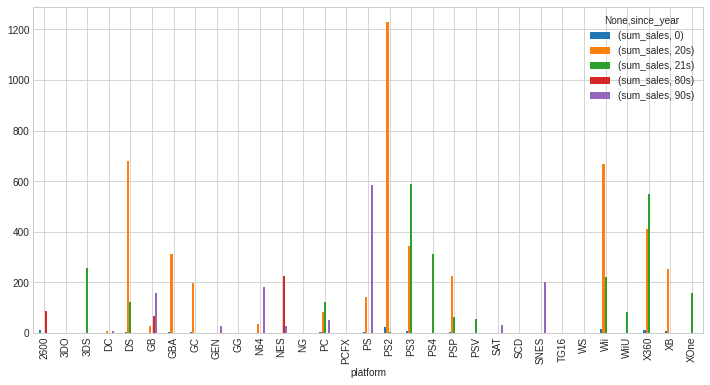

In [74]:
# Vendas por período e pela plataforma
plataform_sice = pd.pivot_table (games, index = 'platform', columns = ['since_year'], values = ['sum_sales'], aggfunc = 'sum').plot(kind = 'bar', figsize = (12,6));

É possível confirmar que as vendas têm picos sazonais, com provável venda de jogos próximo ao primeiro ano de lançamento do console. Destaque PS, PS2, DS e Wii. Os consoles mais antigos têm jogos com vendas insignificantes. Outros consoles que tiveram jogos vivem mais nas vendas, DS, GB, PS3, PSP, Wii, X360. O PC é o menos popular entre as plataformas.

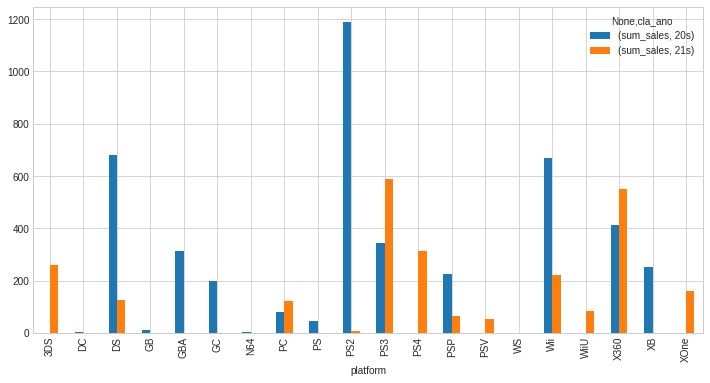

In [75]:
# Verificando jogos que foram mais vendidos 
games_top_sells = pd.pivot_table (games[games ['year_of_release'] > 2000], index = 'platform', columns = ['cla_ano'], values = ['sum_sales'], aggfunc = 'sum').plot(kind = 'bar', figsize = (12,6));

Verificando jogos com year_of_release maior que 2000s é possível limitar certas plataformas, a questão é que não é possível responder a pergunta "Encontre plataformas que eram populares mas agora não vendem" já que temos apenas o ano de lançamento. de jogos e não o ano em que o jogo foi vendido. No entanto, a probabilidade de um jogo com um ano de lançamento ser vendido hoje é muito baixa.

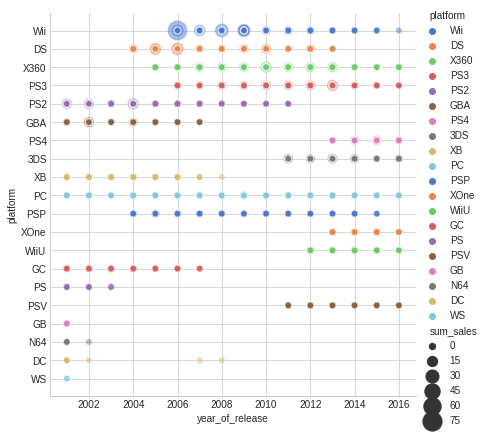

In [76]:
# Criando gráfico de dispersão para visualizar a quantidade de vendas e o início e fim de lançamento para as plataformas
sns.relplot(x="year_of_release", y="platform", hue="platform", size="sum_sales", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=games[games ['year_of_release'] > 2000]);

É possível notar que o PC sempre tem vendas, a vida útil de vendas dos jogos de plataforma é de cerca de 8 anos até que uma nova plataforma apareça, mas não é regra, outras plataformas têm vendas há muito tempo. As vendas caem ao longo dos anos.

### Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.

Usaremos dados de 2014, pois projetamos informações de 2017 e, conforme sugerido pelas informações do projeto, as informações de 2016 podem não estar completas.

In [77]:
# Vamos criar um novo data_frame apenas com os dados que iremos considerar
games_atual = games[games ['year_of_release'] > 2013]

### Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

In [80]:
# Pivot talbe para observar vendas de forma nominal
pgames = pd.pivot_table(games_atual, index = ['platform','year_of_release'], values = ['na_sales','eu_sales','jp_sales','other_sales', 'sum_sales'], aggfunc = 'sum')               
pgames.sort_values(by = ['year_of_release','sum_sales'], ascending = False)
pgames.reset_index()

,platform,year_of_release,eu_sales,jp_sales,na_sales,other_sales,sum_sales
0,3DS,2014.0,8.73,20.69,12.33,2.01,43.76
1,3DS,2015.0,5.06,15.52,6.17,1.03,27.78
2,3DS,2016.0,2.33,8.03,4.14,0.64,15.14
3,PC,2014.0,8.87,0.00,3.51,0.90,13.28
4,PC,2015.0,5.57,0.00,2.36,0.59,8.52
5,PC,2016.0,3.53,0.00,1.36,0.36,5.25
6,PS3,2014.0,18.24,6.25,16.39,6.88,47.76
7,PS3,2015.0,6.04,3.67,4.99,2.12,16.82
8,PS3,2016.0,1.26,1.30,0.67,0.37,3.60
9,PS4,2014.0,46.50,2.97,34.75,15.78,100.00


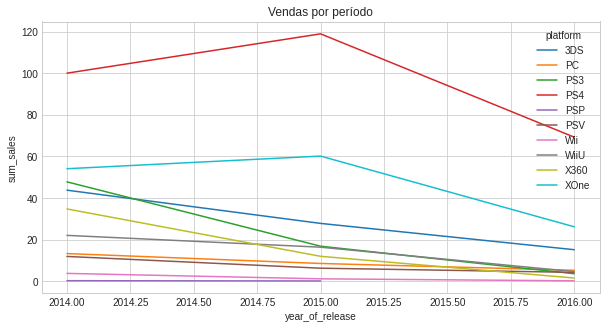

In [81]:
# Aqui iremos criar gráfico de linhas para visualizar vendas e deixar mais visivel para outros observarem
plt.figure(figsize=(10,5))
sns.lineplot(data=pgames, x = 'year_of_release', y = 'sum_sales', hue = 'platform').set(title='Vendas por período');

É possível observar pelo gráfico e pela tabela dinâmica que não há estágio em um bom período de vendas, todas elas apresentam queda ou estabilidade, as plataformas que apresentam melhor desempenho em 2016 são: PS4, XObe, 3DS, PC, WiiU.

### Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

In [82]:
# Criando df apenas com as plataformas que tiveram vendas expressivas em 2016
games_plat = games_atual[~games_atual.platform.isin (['PSP','DS','PS2','PS3','X360','Wii'])]

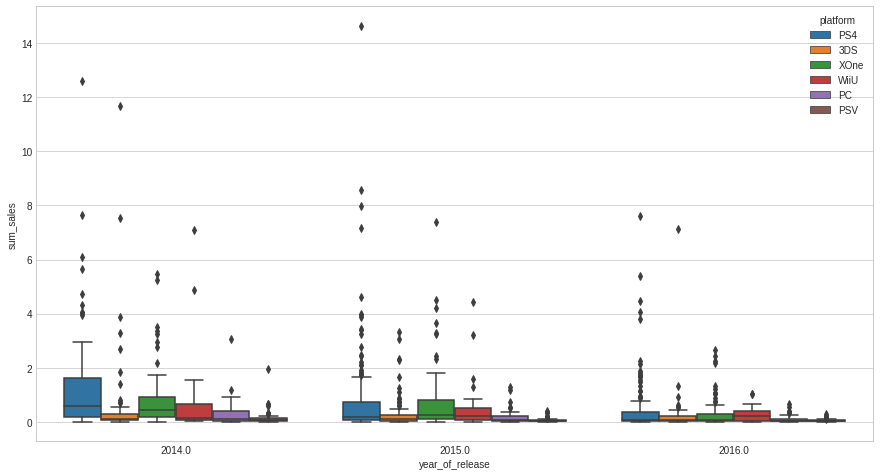

In [83]:
plt.figure(figsize=(15,8))
sns.boxplot(data=games_plat, x='year_of_release',y='sum_sales', hue = 'platform');

Nota-se que existem muitos valores atípicos, iremos novamente aplicar os metodos de variação interquartil para analisar melhor os gráficos.

In [84]:
# Utilizando o iqr, q1 são os valores do primeiro quartil, q3 os valores do terceiro quartil
Q1g = games_plat['sum_sales'].quantile(0.25)
Q3g = games_plat['sum_sales'].quantile(0.75)
IQRg = Q3 - Q1
games_plat = games_plat.query('(@Q1 - 1.5 * @IQR) <= sum_sales <= (@Q3 + 1.5 * @IQR)')

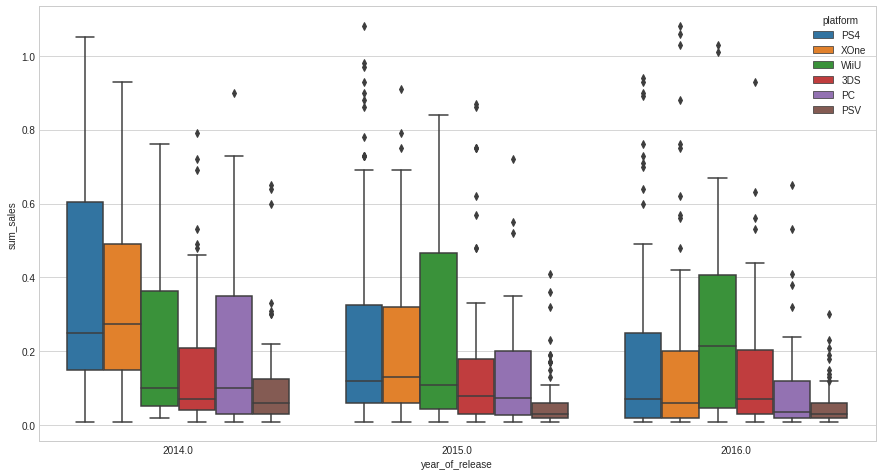

In [85]:
# Plotamos novamente e houve melhora significativa para a análise
plt.figure(figsize=(15,8))
sns.boxplot(data=games_plat, x='year_of_release',y='sum_sales', hue = 'platform');

É possível notar que em 2017 as plataformas PS4 e Xbox One se destacaram, assim como o WiiU, mas a plataforma WiiU tanto em 2015 quanto em 2016 se destacou das demais, embora a mediana do total de vendas tenha sido inferior ao Xone e PS4. em 2015, em 2016 passou com algum lucro. Em 2015, destacaram-se as vendas totais de jogos WiiU, PS4 e Xbox One. 3DS e PC seguem logo depois e PSV permanece estável nos dois anos. Em 2016, é possível observar uma queda nas vendas para todas as plataformas, exceto para o 3DS.

### Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.

In [86]:
games_atual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,cla_ano,sinse_year,since_year
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,21s,21s,21s
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,21s,21s,21s
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68,21s,21s,21s
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,21s,21s,21s
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98,21s,21s,21s


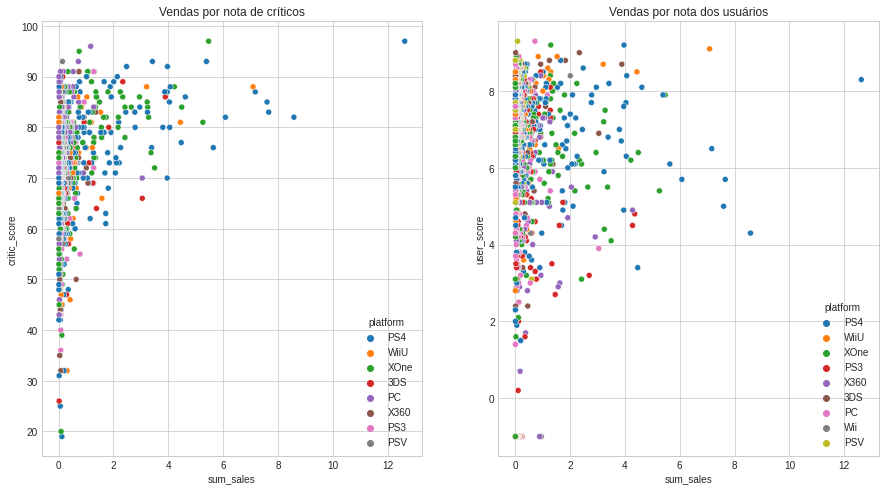

In [93]:
# Utilizando gráfico de dispersão do score dos críticos excluindo valores nulos
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.scatterplot (data = games_atual[~games_atual['critic_score'].isna()], x = 'sum_sales', y = 'critic_score', hue = 'platform', ax=ax[0]).set(title='Vendas por nota de críticos')
sns.scatterplot (data = games_atual[~games_atual['user_score'].isna()], x = 'sum_sales', y = 'user_score', hue = 'platform', ax=ax[1]).set(title='Vendas por nota dos usuários')
fig.show();


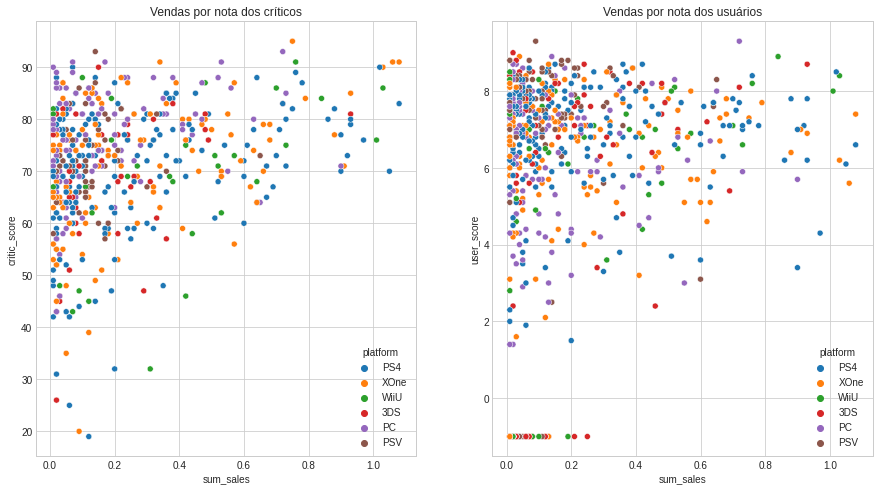

In [94]:
# Utilizando do mesmo gráfico com o dataset com iqr aplicado e sem valores ausentes nas colunas critics score e user score
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.scatterplot (data = games_plat[~games_plat['critic_score'].isna()], x = 'sum_sales', y = 'critic_score', hue = 'platform', ax=ax[0]).set(title='Vendas por nota dos críticos')
sns.scatterplot (data = games_plat[~games_plat['user_score'].isna()], x = 'sum_sales', y = 'user_score', hue = 'platform', ax=ax[1]).set(title='Vendas por nota dos usuários')
fig.show()

É possível notar que, em todas as plataformas onde os jogos foram lançados a partir de 2014, apesar de algumas inconsistências importantes, tanto na pontuação da crítica quanto na pontuação dos usuários de tudo que foi vendido, é possível ver uma grande quantidade. de vendas de jogos com notas mais altas do que notas mais baixas. Após utilizar o intervalo interquartil, ainda é possível perceber que quanto maiores os escores, maiores as vendas, porém de forma mais dispersa.

**Iremos considerar as plataformas X-One, PS4, WiiU e PC para análise de correlação de notas e vendas.**

In [98]:
# Fazendo uma matriz de correlação para a plataforma X-One
corrMatrixX = games_atual[(games_atual['platform']=='XOne') & ((~games_atual['critic_score'].isna()) & (~games_atual['user_score'].isna()))][['sum_sales','critic_score','user_score']].corr()
corrMatrixX.reset_index()

,index,sum_sales,critic_score,user_score
0,sum_sales,1.000000,0.426843,-0.011949
1,critic_score,0.426843,1.000000,0.436163
2,user_score,-0.011949,0.436163,1.000000


In [99]:
# Fazendo a mesma matriz de correlação mas para a plataforma PS4
corrMatrixP = games_atual[(games_atual['platform']=='PS4') & ((~games_atual['critic_score'].isna()) & (~games_atual['user_score'].isna()))][['sum_sales','critic_score','user_score']].corr()
corrMatrixP

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.402076,-0.014965
critic_score,0.402076,1.000000,0.492473
user_score,-0.014965,0.492473,1.000000


In [100]:
# Fazendo a mesma matriz de correlação para a plataforma WiiU
corrMatrixW = games_atual[(games_atual['platform']=='WiiU') & ((~games_atual['critic_score'].isna()) & (~games_atual['user_score'].isna()))][['sum_sales','critic_score','user_score']].corr()
corrMatrixW

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.370201,0.346501
critic_score,0.370201,1.000000,0.513229
user_score,0.346501,0.513229,1.000000


In [101]:
# Fazendo a mesma matriz de correlação para a plataforma PC
corrMatrixPc = games_atual[(games_atual['platform']=='PC') & ((~games_atual['critic_score'].isna()) & (~games_atual['user_score'].isna()))][['sum_sales','critic_score','user_score']].corr()
corrMatrixPc

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.172061,-0.089974
critic_score,0.172061,1.000000,0.466099
user_score,-0.089974,0.466099,1.000000


De acordo com as matrizes de correlação das quatro plataformas consideradas para análise, observa-se uma baixa correlação entre notas e vendas totais, não há forte correlação entre notas e vendas. Ainda é possível chegar a uma conclusão semelhante ao gráfico de dispersão, onde se observa uma correlação maior entre as avaliações da crítica e as vendas do que entre as avaliações dos usuários e as vendas.

### Tendo suas conclusões em mente, compare as vendas dos mesmos jogos em outras plataformas.

In [102]:
# Verificando jogos que tem em multiplas plataformas
games_atual['name'].value_counts().head(10)

The LEGO Movie Videogame             8
LEGO The Hobbit                      8
Lego Batman 3: Beyond Gotham         8
FIFA 15                              8
LEGO Jurassic World                  8
The Amazing Spider-Man 2 (2014)      7
LEGO Marvel's Avengers               7
Lego Star Wars: The Force Awakens    7
Skylanders: Trap Team                7
Skylanders: SuperChargers            7
Name: name, dtype: int64

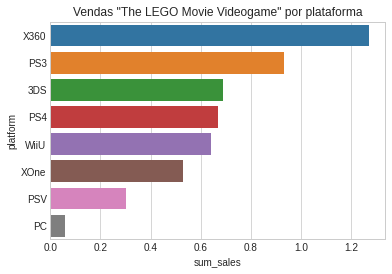

In [103]:
# Criando gráfico para comparar vendas de um determinados jogos por plataforma
sns.barplot (data = games_atual[games_atual['name'] == 'The LEGO Movie Videogame'], x = 'sum_sales', y = 'platform').set(title = 'Vendas "The LEGO Movie Videogame" por plataforma');

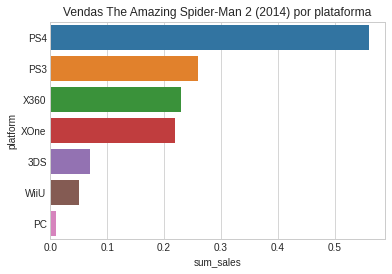

In [104]:
sns.barplot (data = games_atual[games_atual['name'] == 'The Amazing Spider-Man 2 (2014)'], x = 'sum_sales', y = 'platform').set(title='Vendas The Amazing Spider-Man 2 (2014) por plataforma');

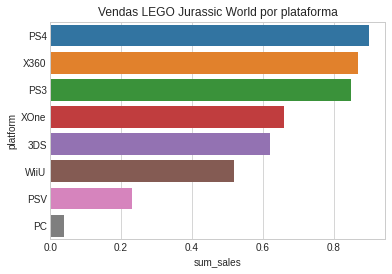

In [105]:
sns.barplot (data = games_atual[games_atual['name'] == 'LEGO Jurassic World'], x = 'sum_sales', y = 'platform').set(title='Vendas LEGO Jurassic World por plataforma');

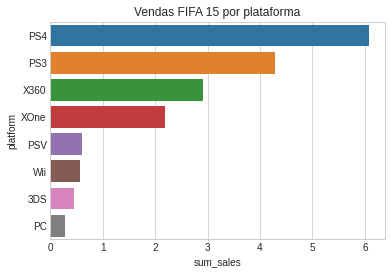

In [106]:
sns.barplot (data = games_atual[games_atual['name'] == 'FIFA 15'], x = 'sum_sales', y = 'platform').set(title='Vendas FIFA 15 por plataforma');

É possível garantir que um mesmo jogo possa ter mais vendas em algumas plataformas do que em outras.

### Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

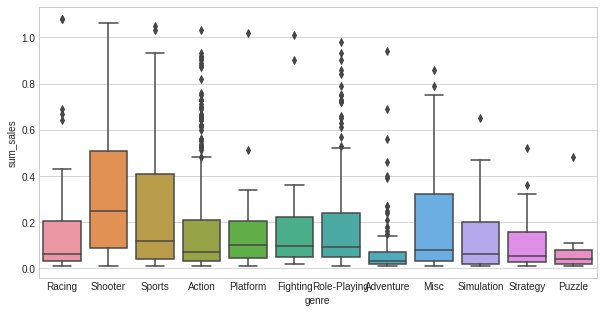

In [107]:
plt.figure(figsize=(10,5))
sns.boxplot(data=games_plat, x='genre',y='sum_sales');

É possível garantir que os tipos shooter, sports, platform, arcade e Misc tenham as melhores vendas.

## Criar um perfil de usuário para cada região

In [108]:
#Criando uma tabela pivot para criar os perfis por rating
games_rat = pd.pivot_table(games_plat, columns = 'rating', values = ['eu_sales','na_sales','jp_sales','other_sales'], aggfunc = 'sum')
games_rat.reset_index()

rating,index,E,E10+,M,T
0,eu_sales,11.46,14.57,15.54,12.07
1,jp_sales,2.11,2.35,1.99,8.23
2,na_sales,8.23,15.90,15.48,12.66
3,other_sales,2.60,4.07,3.90,3.56


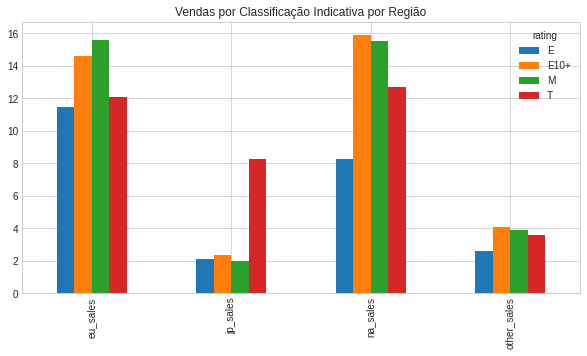

In [112]:
# Plotando o rating por vendas por região para verificar as vendas 
games_rat.plot(kind = 'bar', figsize=(10,5));
plt.title('Vendas por Classificação Indicativa por Região');

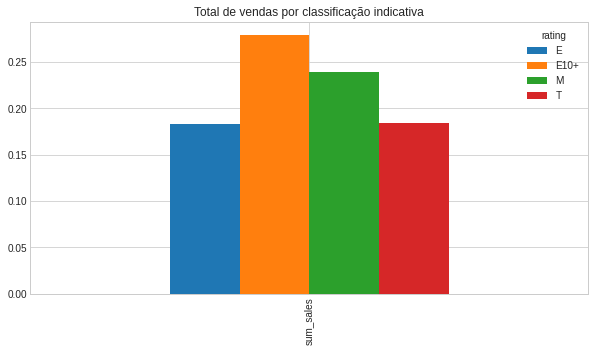

In [114]:
pd.pivot_table(games_plat, columns = 'rating', values = ['sum_sales']).plot(kind='bar', figsize=(10,5));
plt.title('Total de vendas por classificação indicativa');

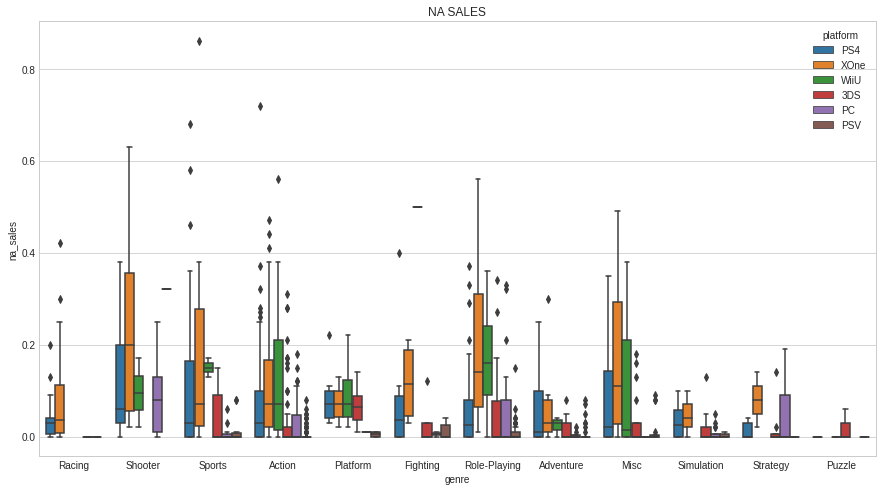

In [116]:
# Criando boxplots para verificar os perfis de vendas por região
plt.figure(figsize=(15,8))
sns.boxplot(data=games_plat, x='genre',y='na_sales', hue = 'platform').set(title='NA SALES');

Sobre os estados unidos é possível afirmar que: 
- As 5 principais plataformas:
    X-One, WiiU, PS4, 3DS e PC;
- Os 5 principais gêneros: 
    Shooter, Sports, Role Playning, Misc e Platform.
- Em termos de classificação, os jogos E10 dos Estados Unidos (todos com mais de 10 anos) e M (mais de 17 anos) vendem mais.

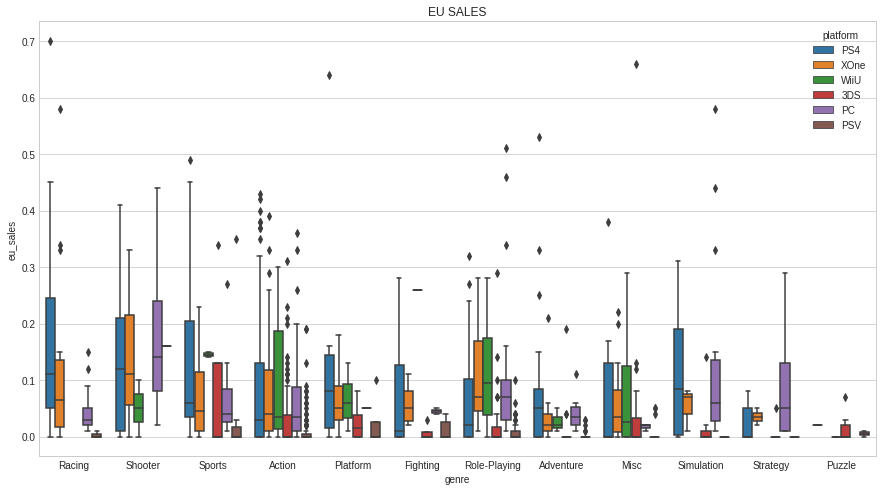

In [115]:
plt.figure(figsize=(15,8))
sns.boxplot(data=games_plat, x='genre',y='eu_sales', hue = 'platform').set(title='EU SALES');

Sobre a Europa é possível afirmar que:
- As 5 principais plataformas:
    PS4, XOne, WiiU, 3DS e PC;
- Os 5 principais gêneros: 
    Racing, Shooter, Sports, Simulation e Role-Playing, porém vemos muito equilibrio entre os gêneros.
- Na classificação, como nos Estados Unidos, mas em ordem, os jogos classificados como M (mais de 17 anos) e E10 (todos com mais de 10 anos) vendem mais.

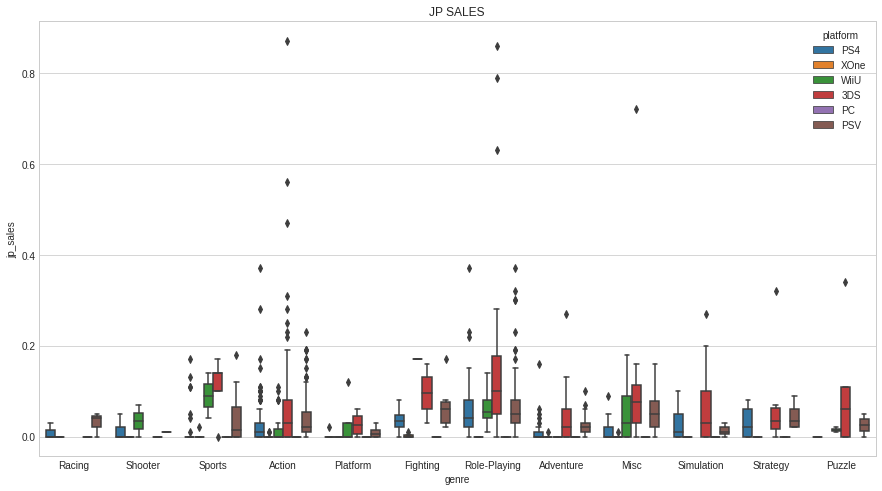

In [117]:
plt.figure(figsize=(15,8))
sns.boxplot(data=games_plat, x='genre',y='jp_sales', hue = 'platform').set(title='JP SALES');

Para as vendas no Japão é possível afirmar que:
- As 5 principais plataformas:
    PS4, 3DS, PSV, WiiU e PC;
- Os 5 principais gêneros: 
    Role Playing, Sports, Action, Misc e Simulation.
- Sobre a classificação para o Japão jogos T(teen) e E(Everyone) vendem mais.

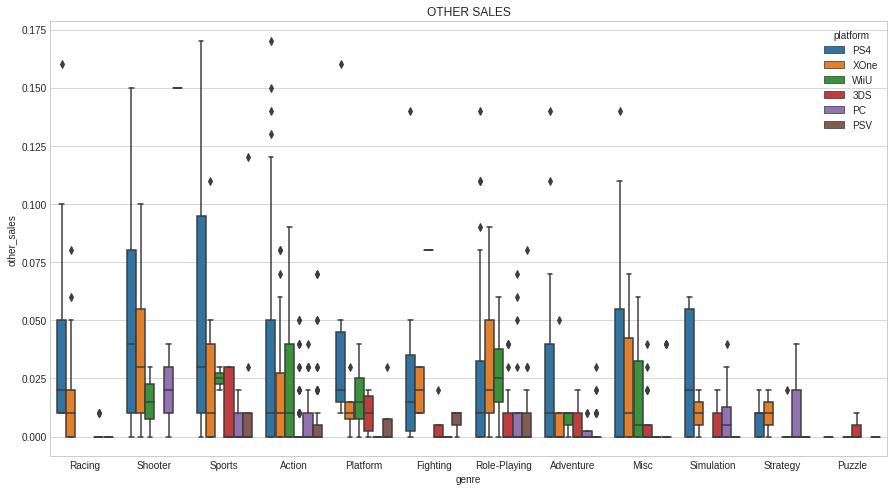

In [118]:
plt.figure(figsize=(15,8))
sns.boxplot(data=games_plat, x='genre',y='other_sales', hue = 'platform').set(title='OTHER SALES');

Para outras regiões é possível afirmar que:
- As 5 principais plataformas:
    PSV, PS4, XOne, 3DS e PC;
- Os 5 principais gêneros: 
    Shooter, Sports, Simulation, Role-Playing e Misc;
- Sobre a classificação dos jogos para vendas nos demais países M(Mature 17+ anos) e E10(Everyone 10+ anos) são os que mais vendem, porém com maior equilibrio entre as classificações indicativas.

## Teste das hipóteses

**As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.**

In [121]:
# Criando um df apenas com os dados necessarios para testar a hipotese.
# As classificações médias dos usuários das plataformas Xbox One e PC serão as mesmas.

user_xone = games_plat[(games_plat['platform']=='XOne')][['user_score']]
user_xone.shape

(188, 1)

In [123]:
# Criando um df apenas com os dados necessarios para testar a hipotese
# As classificações médias dos usuários das plataformas Xbox One e PC serão as mesmas.
spc = games_plat[(games_plat['platform']=='PC')][['user_score']]
spc.shape

(147, 1)

In [124]:
# Pegando amostra aleatória com 100 linhas dos dois dataframes

user_xone = user_xone.sample(n=100)
spc = spc.sample(n=100)

In [125]:
# Calculando a var da amostra xbox (nanvar para não considerar nulos)
np.nanvar(user_xone)

5.078323986540618

In [126]:
# Calculando a variancia da amostra pc
np.nanvar(spc)

5.180232426303855

In [127]:
alpha = 0.05
teste_hip = st.ttest_ind(sxone, spc, equal_var = False, nan_policy='omit')

if teste_hip.pvalue < alpha:
    print ('Podemos rejeitar a hipótese nula')
else:
    print ('Não podemos rejeitar a hipótese nula')
print ('pvalue:', teste_hip.pvalue)

Não podemos rejeitar a hipótese nula
pvalue: 0.9906441583710479


*Considerando nível crítico de variância estatística 0.05*

Para análise, consideramos o uso de testes de hipóteses para igualdade de médias de duas populações. Verificamos equal_var = False porque as variáveis ​​estatísticas são únicas.

- Hipótese nula: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
- Hipótese alternativa: As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.

**As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.**

In [128]:
# Criando dataframe apenas com os dados necessarios para testar a hipotese As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.
saction = games_plat[(games_plat['genre']=='Action')][['user_score']]
saction.shape

(460, 1)

In [129]:
# Criando dataframe apenas com os dados necessarios para testar a hipotese As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.
ssports = games_plat[(games_plat['genre']=='Sports')][['user_score']]
ssports.shape

(85, 1)

In [130]:
# Pegando amostra aleatória com 60 linhas dos dois dataframes
saction = saction.sample(n=60)
ssports = ssports.sample(n=60)

In [131]:
# Calculando a variancia da amostra action (nanvar para não considerar nulos)
np.nanvar(saction)

0.48422496570644713

In [132]:
# Calculando a variancia da amostra sports (nanvar para não considerar nulos)
np.nanvar(ssports)

4.525368945224082

In [133]:
alpha1 = 0.05
teste_hip1 = st.ttest_ind(saction, ssports, equal_var = False, nan_policy='omit')

if teste_hip1.pvalue < alpha:
    print ('Podemos rejeitar a hipótese nula')
else:
    print ('Não podemos rejeitar a hipótese nula')
print ('pvalue:', teste_hip1.pvalue)

Podemos rejeitar a hipótese nula
pvalue: 6.585679111618055e-08


*Considerando nível crítico de variância estatística 0.05*

Para análise, consideramos o uso de testes de hipóteses para igualdade de médias de duas populações. Verificamos equal_var = False porque as variáveis ​​estatísticas são únicas.

- Hipótese nula: Não, as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) não são diferentes.

- Hipótese alternativa: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

**Não possuimos argumentos sufucientes para rejeitar a hipótese nula**. Há uma probabilidade de 89% em uma amostra aleatória de que as classificações médias dos usuários para gêneros de ação e esportes sejam as mesmas, uma probabilidade relativamente alta, dado um nível de confiança de 5%, para garantir que haja uma diferença significativa na classificação. Média de usuários de Ações e tipos de esportes.

## Conclusão

- Para criar um modelo para o ano de 2017, seria interessante utilizar dados do ano de 2014, pois as plataformas mais antigas não possuem lançamentos de jogos recentes e o ano de 2016 pode não estar completo;
- Avaliações de críticos ou usuários não afetam de forma alguma as vendas do jogo;
- O uso de diferentes tipos de jogos varia de acordo com a plataforma;
- As vendas diminuem de acordo com a vida útil da plataforma, as plataformas têm cerca de 8 anos de vida, o PC sempre tem vendas.
- Regiões têm perfis de uso diferentes tanto em termos de tipos de jogos quanto de plataformas;
- A região japonesa usa a maioria dos jogos em que a classificação de referência é Teen and Everyone, enquanto a Europa, os Estados Unidos e outros países usam a maioria dos jogos em que a classificação de referência é E10 ou Mature
- Em ambas as hipóteses, não há argumentos suficientes para rejeitar a hipótese nula.